In [3]:
!pip install auto-ts --no-deps --ignore-installed
!pip install 'fsspec>=0.3.3'
!pip install statsmodels --upgrade
!pip install pmdarima

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from auto_ts import auto_timeseries

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


Imported auto_timeseries version:0.0.71. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [3]:
df = pd.read_csv('electricity_consumption.csv', parse_dates = ['Bill_Date'],date_parser=parse)

In [4]:
df

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  53
Columns  :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values :   Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values :  
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [7]:
ec_df = df.set_index('Bill_Date')

In [8]:
ec_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [9]:
ec_data = ec_df['Billed_amount']
ec_data.head()

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
Name: Billed_amount, dtype: float64

<Axes: xlabel='Bill_Date'>

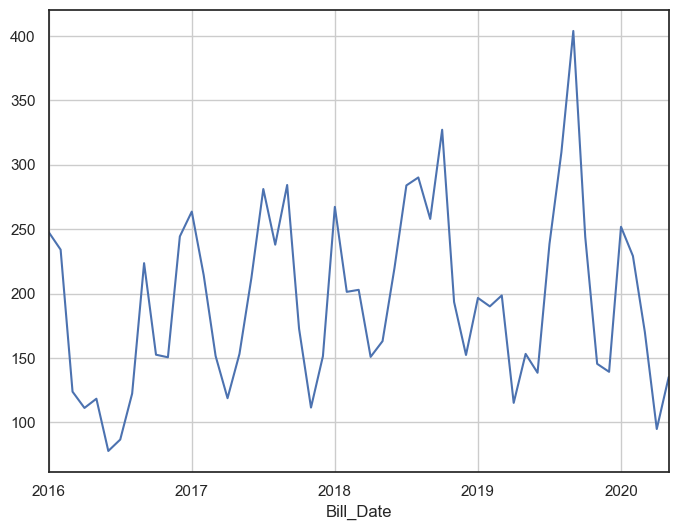

In [10]:
ec_data.plot(grid=True)


<Axes: xlabel='Bill_Date'>

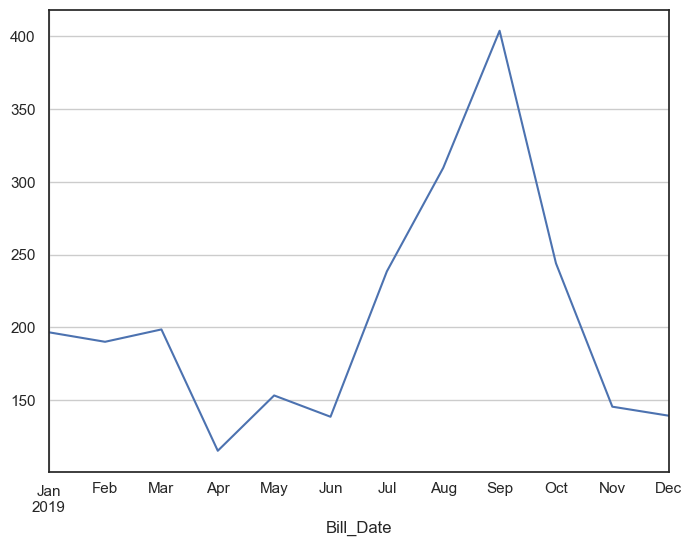

In [11]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['Billed_amount']
ec_data_2019.plot(grid=True)

<Axes: xlabel='Bill_Date'>

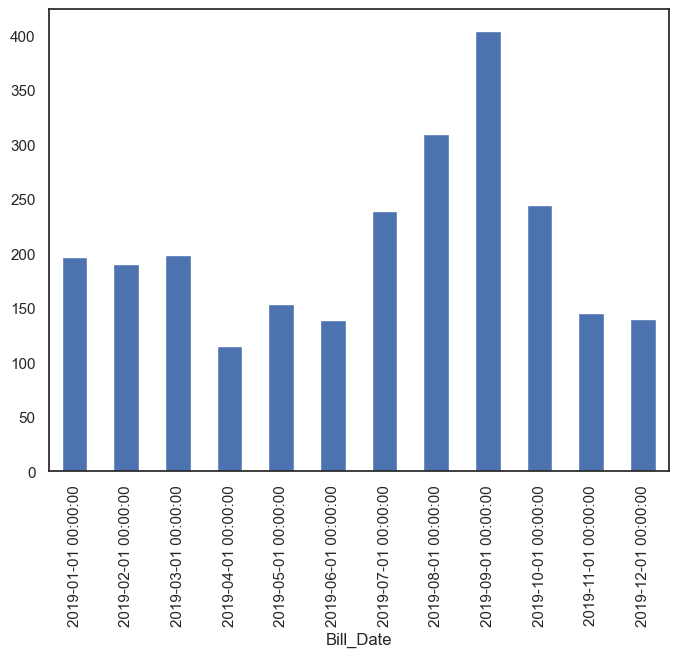

In [12]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['Billed_amount']
ec_data_2019.plot.bar()

array([<Axes: xlabel='Bill_Date'>, <Axes: xlabel='Bill_Date'>,
       <Axes: xlabel='Bill_Date'>, <Axes: xlabel='Bill_Date'>],
      dtype=object)

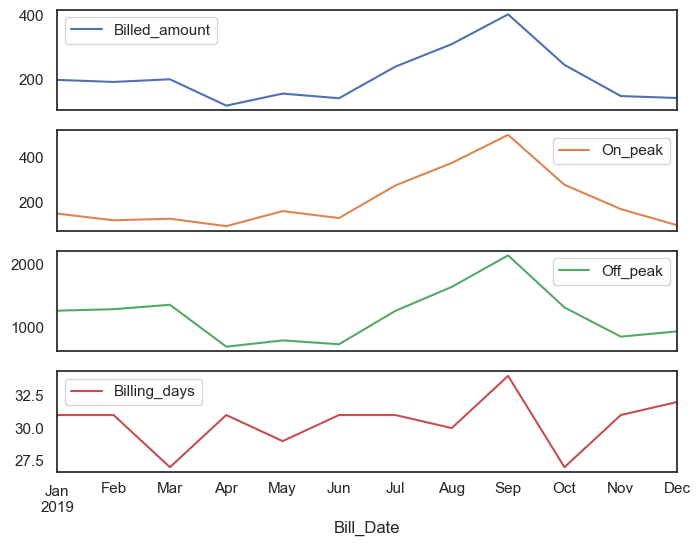

In [13]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019[['Billed_amount','On_peak','Off_peak','Billing_days']]
ec_data_2019.plot(subplots=True)

In [14]:
final_df = df.copy()

In [15]:
final_df.head(10)

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29
5,2016-06-01,63,245.7,37.8,77.81,32
6,2016-07-01,110,429.0,66.0,86.67,30
7,2016-08-01,176,686.4,105.6,122.40,29
8,2016-09-01,357,1392.3,214.2,223.62,33
9,2016-10-01,235,916.5,141.0,152.54,29


In [134]:
final_df=final_df[['Bill_Date','On_peak','Off_peak','Billed_amount','Billing_days']]

In [135]:
train = final_df[:50]
test = final_df[50:]
print(train.shape, test.shape)
train.head()

(50, 5) (3, 5)


,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,247.73,31
1,2016-02-01,292,1138.8,234.11,31
2,2016-03-01,130,507.0,123.85,29
3,2016-04-01,117,456.3,111.22,29
4,2016-05-01,136,530.4,118.37,29


In [18]:
ts_column = 'Bill_Date'
sep = ','
target = 'Billed_amount'

Use Verbose=1 for more detailed charts

In [20]:
model = auto_timeseries(score_type='rmse',forecast_period=12,
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)

Start of Fit.....
    Target variable given as = Billed_amount
Start of loading of data.....
    Inputs: ts_column = Bill_Date, sep = ,, target = ['Billed_amount']
    Using given input: pandas dataframe...
    Bill_Date column exists in given train data...
    train data shape = (50, 4)
Alert: Could not detect strf_time_format of Bill_Date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


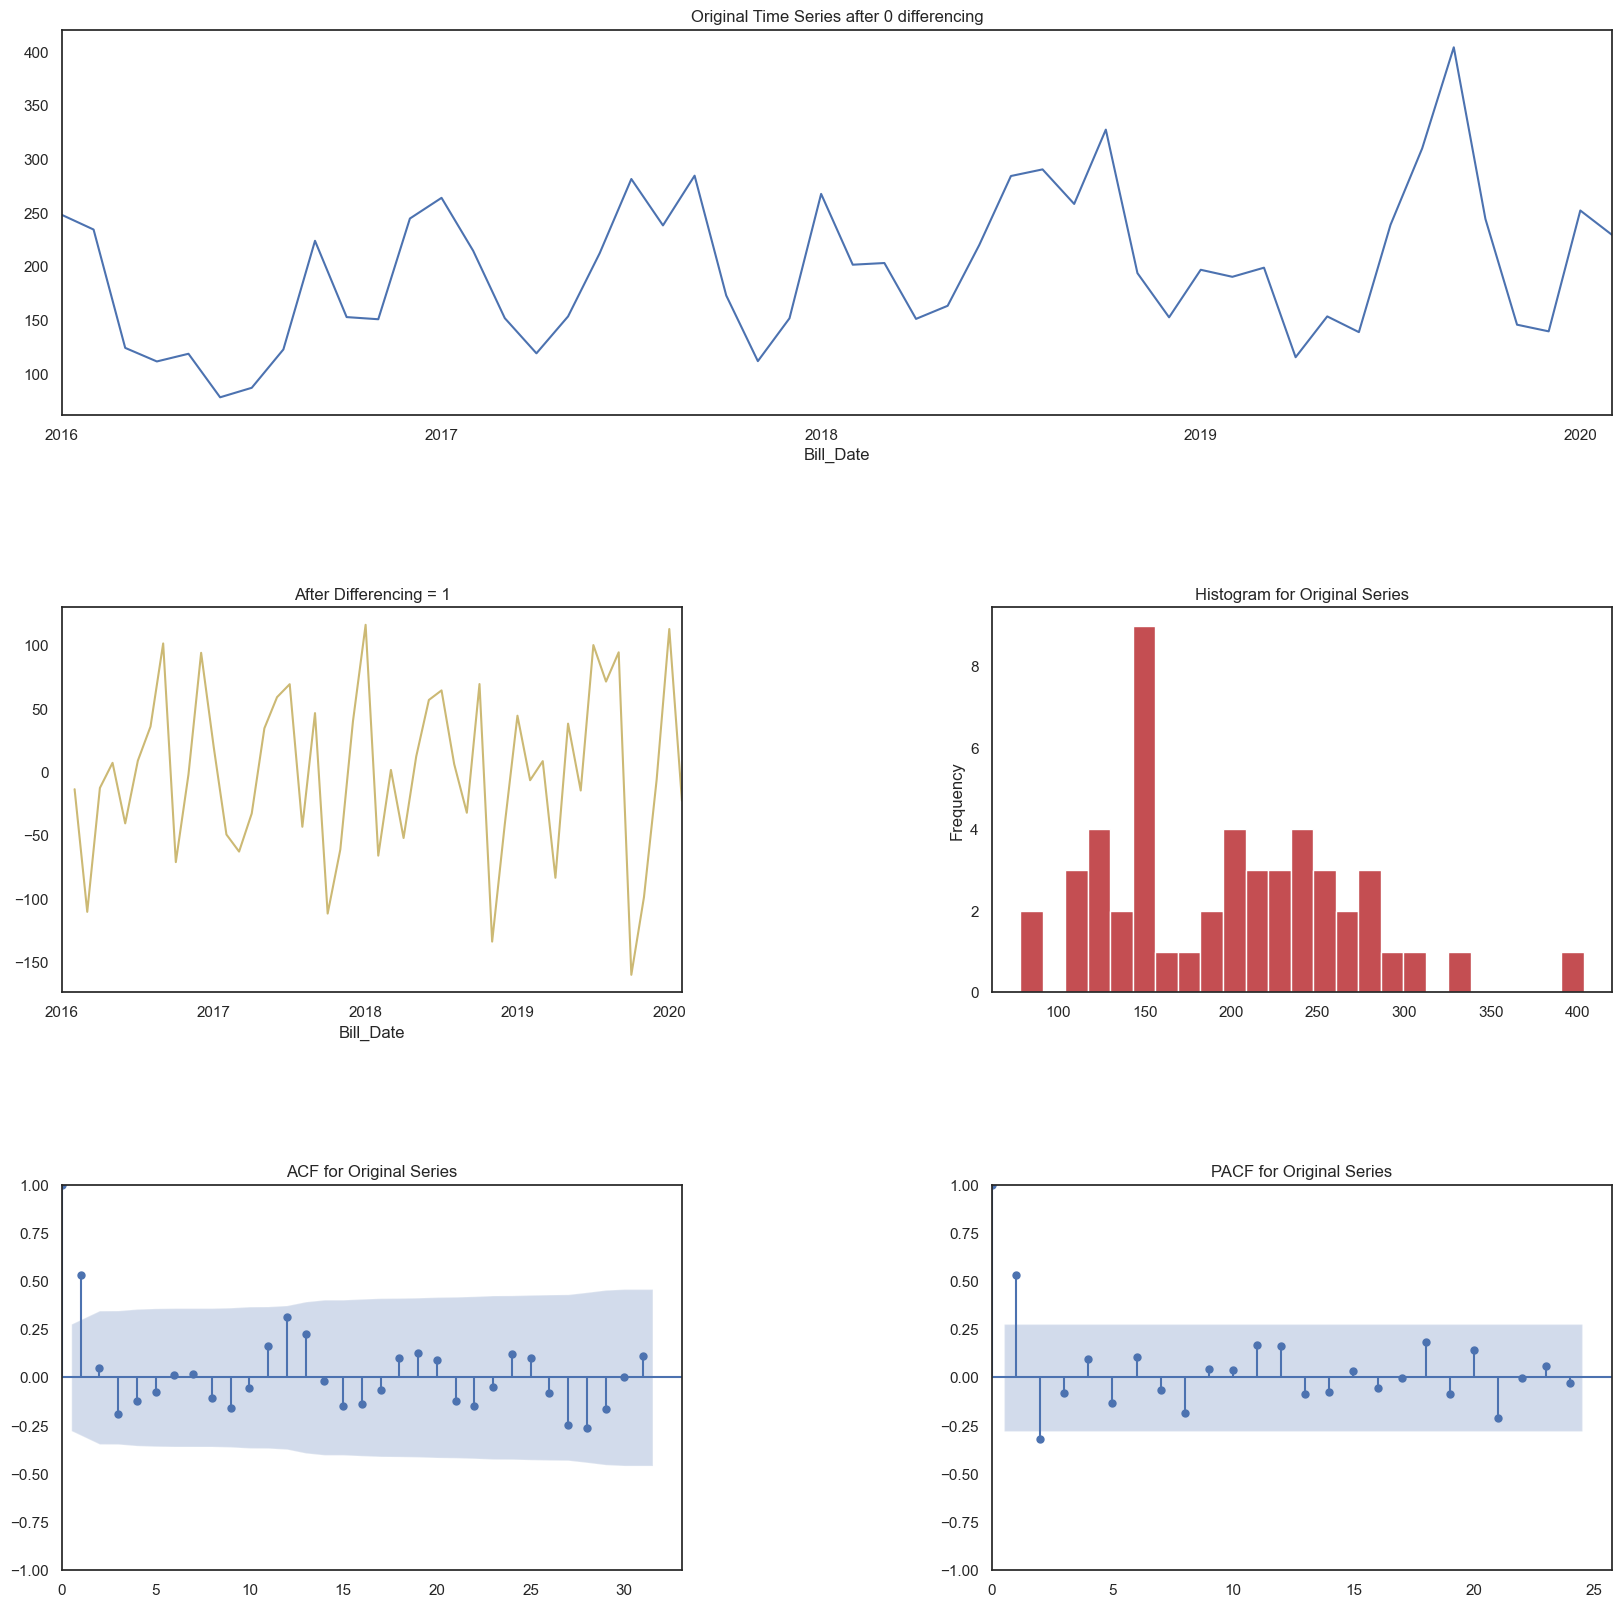

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


13:05:40 - cmdstanpy - INFO - Chain [1] start processing


kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(50, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 8 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 10 Test Shape: 8


13:05:40 - cmdstanpy - INFO - Chain [1] done processing
13:05:40 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 105.65
    Std Deviation of actuals = 48.61
    Normalized RMSE (as pct of std dev) = 217%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 18 Test Shape: 8


13:05:40 - cmdstanpy - INFO - Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12
Lowering forecast period to 8 to enable cross_validation

Fold Number: 1 --> Train Shape: 10 Test Shape: 8

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.027, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=116.013, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=118.012, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=118.012, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113.452, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[

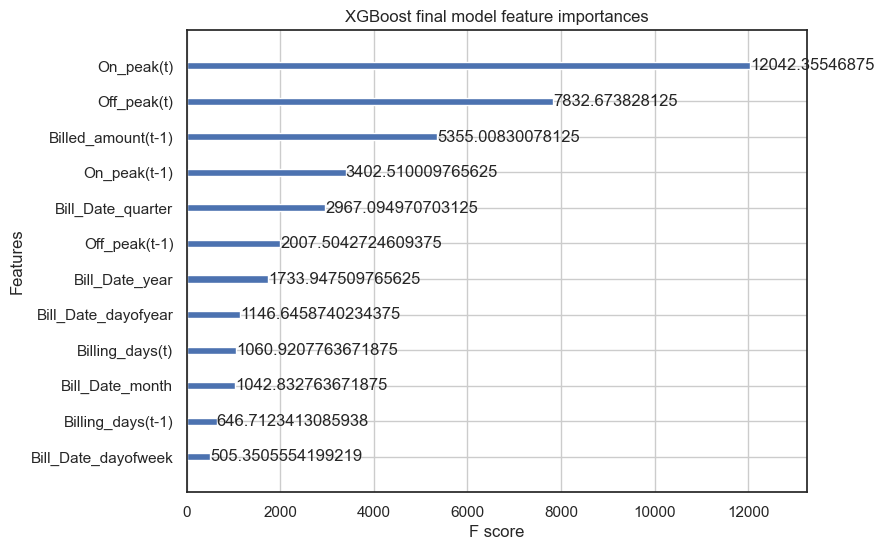

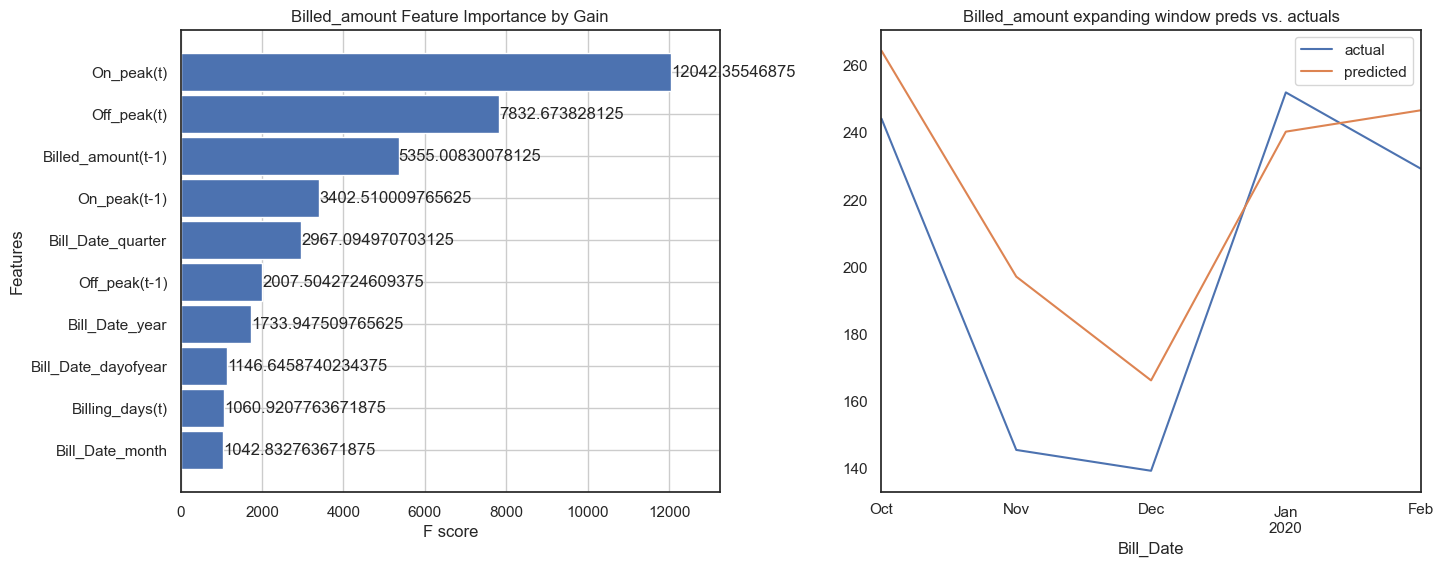

In [21]:
model.fit(train, ts_column,target)

In [22]:
model.predict(test, model='best')

Predicting using test dataframe shape = (3, 5) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Bill_Date. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Bill_Date,,,,
2020-03-01,215.123184,NaN,NaN,NaN
2020-04-01,133.752914,NaN,NaN,NaN
2020-05-01,156.966492,NaN,NaN,NaN


**Evaluate Results**

In [27]:
results_dict = model.get_ml_dict()

In [28]:
results_dict['Prophet']['forecast']  

In [29]:
results_dict

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
            {'Prophet': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': <auto_ts.models.build_prophet.BuildProphet at 0x241892ccb50>}),
             'auto_SARIMAX': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': <auto_ts.models.ar_based.build_autoarimax.BuildAutoSarimax at 0x24189652d70>}),
             'VAR': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': 

In [31]:
results_dict['auto_SARIMAX']['forecast'] 

In [32]:
results_dict['ML']['forecast'] 

[array([[264.2368 ],
        [197.03017],
        [166.15384],
        [240.1689 ],
        [246.51566]], dtype=float32)]

In [33]:
test['preds'] = model.predict(test, model='ML', simple=False)['yhat'].values

Predicting using test dataframe shape = (3, 5) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Bill_Date. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
ML predictions completed


In [34]:
test

,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days,preds
50,2020-03-01,151,1179.0,170.16,29,215.123184
51,2020-04-01,75,625.0,94.85,29,133.752914
52,2020-05-01,147,686.0,135.19,29,156.966492


<Axes: >

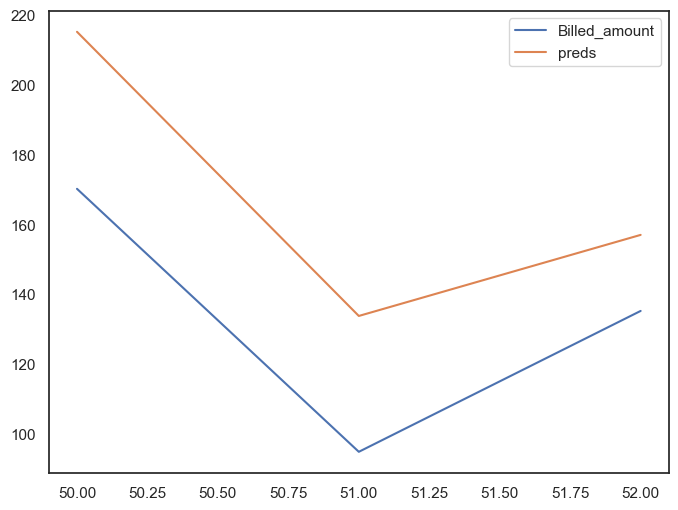

In [35]:
test[[target, 'preds']].plot()

**Forecast Results**

In [36]:
# Using specific model
FORECAST_PERIOD=12
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Predicting using forecast period=12 as input for ML model
Forecast Period is not equal to the number of observations in testdata. The forecast period will be assumed to be the number of observations in testdata.
'ARIMA' object has no attribute 'get_forecast'
Model was trained with train dataframe. Please make sure you are passing a test data frame.


In [37]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Predicting using forecast period=12 as input for ML model
(Error): Model is Multivariate, hence test dataframe must be provided for prediction.


In [38]:
model.get_best_model()

In [39]:
xgb_model = model.get_model('ML')
xgb_model

In [40]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [41]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [42]:
test

,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days,preds
50,2020-03-01,151,1179.0,170.16,29,215.123184
51,2020-04-01,75,625.0,94.85,29,133.752914
52,2020-05-01,147,686.0,135.19,29,156.966492


In [43]:
final_df['yhat'] = model.predict(final_df, model='ML', simple=False)['yhat'].values

Predicting using test dataframe shape = (53, 5) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Bill_Date. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating 

In [44]:
final_df.head()

,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days,yhat
0,2016-01-01,365,1423.5,247.73,31,257.200928
1,2016-02-01,292,1138.8,234.11,31,249.471069
2,2016-03-01,130,507.0,123.85,29,140.407379
3,2016-04-01,117,456.3,111.22,29,122.527107
4,2016-05-01,136,530.4,118.37,29,135.409302


<Axes: >

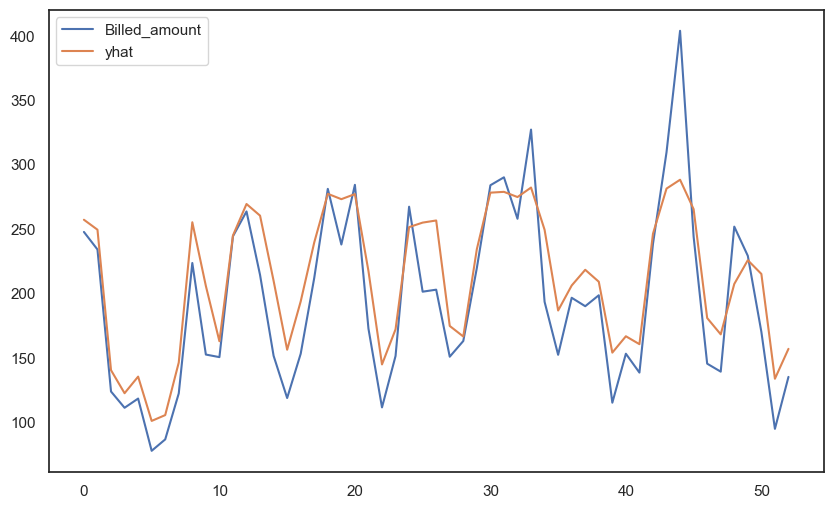

In [45]:
final_df[[target,'yhat']].plot(figsize=(10,6))

In [46]:
results_dict

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
            {'Prophet': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': <auto_ts.models.build_prophet.BuildProphet at 0x241892ccb50>}),
             'auto_SARIMAX': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': <auto_ts.models.ar_based.build_autoarimax.BuildAutoSarimax at 0x24189652d70>}),
             'VAR': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>,
                         {'model': None,
                          'forecast': None,
                          'rmse': inf,
                          'model_build': 

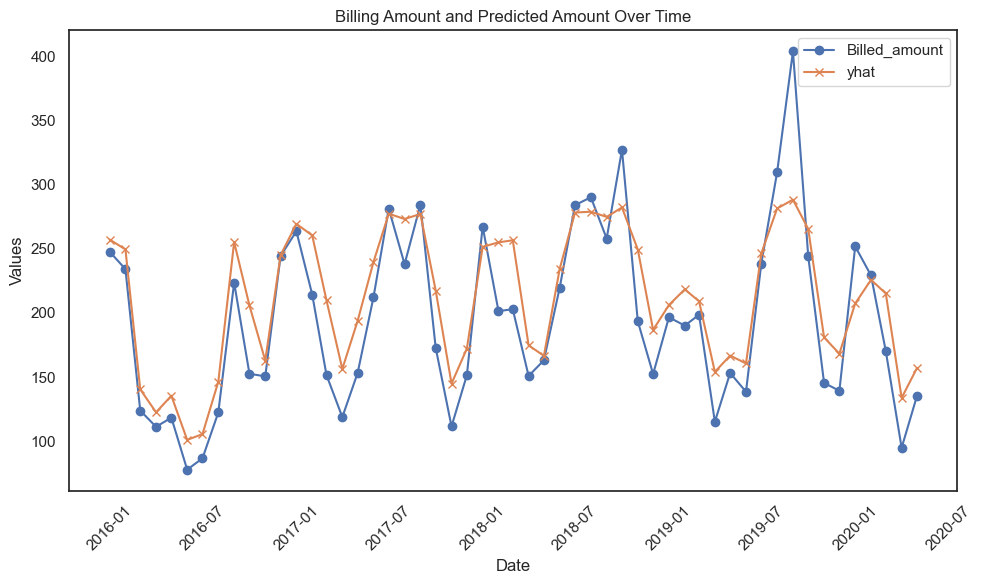

In [47]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# You can convert the 'Bill_Date' column to a datetime object
final_df['Bill_Date'] = pd.to_datetime(final_df['Bill_Date'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Billing_amount over time
ax.plot(final_df['Bill_Date'], final_df['Billed_amount'], label='Billed_amount', marker='o')

# Plot yhat over time
ax.plot(final_df['Bill_Date'], final_df['yhat'], label='yhat', marker='x')

# Customize the plot
ax.set_title('Billing Amount and Predicted Amount Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
final_df.head()

,Bill_Date,On_peak,Off_peak,Billed_amount,Billing_days,yhat
0,2016-01-01,365,1423.5,247.73,31,257.200928
1,2016-02-01,292,1138.8,234.11,31,249.471069
2,2016-03-01,130,507.0,123.85,29,140.407379
3,2016-04-01,117,456.3,111.22,29,122.527107
4,2016-05-01,136,530.4,118.37,29,135.409302


In [104]:
forecast_dates = df['Bill_Date'].tail(2).tolist()  # Extract dates for the forecasted values

# Define a list of next billing dates with the 'YY-MM-DD' format
next_billing_dates = [
    '20-06-01',
    '20-07-01',
    '20-08-01',
    '20-09-01',
    '20-10-01'
]

# Convert the billing dates to datetime objects
next_billing_dates = [pd.to_datetime(date, format='%y-%m-%d') for date in next_billing_dates]

# Append the next billing dates to the forecast_dates
forecast_dates.extend(next_billing_dates)

In [119]:
a=results_dict['ML']['forecast'][0]

In [126]:
forecast_values=[a[0][0],a[1][0],a[2][0],a[3][0],a[4][0]]

In [130]:
forecast_value = final_df['yhat'].tail(2).tolist()
forecast_value.extend(forecast_values)

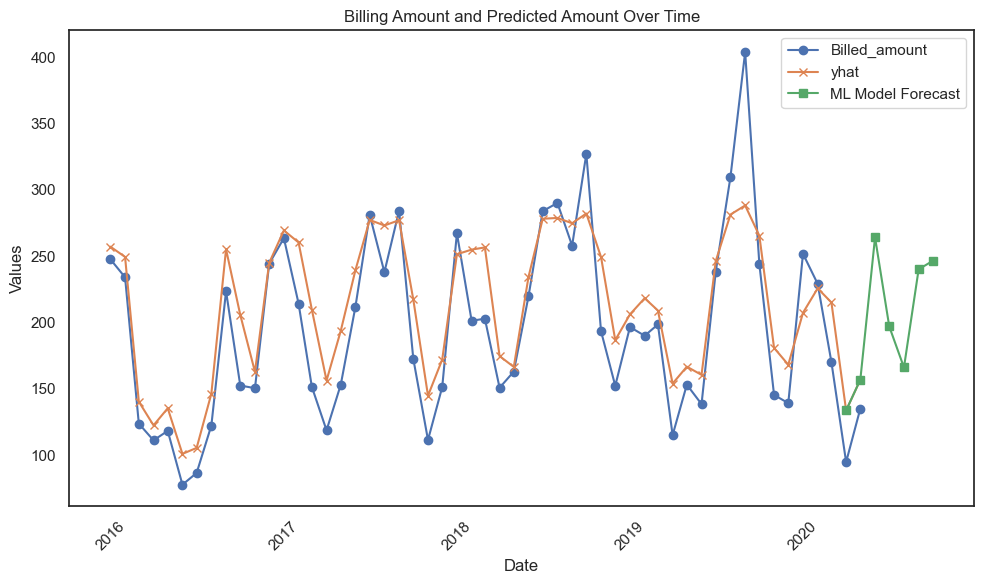

In [132]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# You can convert the 'Bill_Date' column to a datetime object
final_df['Bill_Date'] = pd.to_datetime(final_df['Bill_Date'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Billing_amount over time
ax.plot(final_df['Bill_Date'], final_df['Billed_amount'], label='Billed_amount', marker='o')

# Plot yhat over time
ax.plot(final_df['Bill_Date'], final_df['yhat'], label='yhat', marker='x')
ax.plot(forecast_dates, forecast_value, label='ML Model Forecast', marker='s')
# Customize the plot
ax.set_title('Billing Amount and Predicted Amount Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
